<a href="https://colab.research.google.com/github/tylereriksen/PersonalProjects/blob/main/Linear_Regression_Experiment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This notebook will look to show the Kepler's Third Law. We will do this by linear regression on a dataset of known planets, dwarf planets, and objects from a given dataset (which will contain a subset of all known intrasolar objects to train and test data with). We will be finding the line for the linear regression without using the SKLearn package and with it to see the differences in output.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sklearn
from sklearn import linear_model
from sklearn.utils import shuffle

Make the data set of the planetary values for distance from sun and orbital duration

In [ ]:
d = {'Planet/Dwarf Planet/Object':['Mercury', 'Venus', 'Earth', 'Mars', 'Vesta', 'Ceres', 'Pallas', 'Hygiea', 'Jupiter', 'Saturn', 'Halley\'s Comet', 'Uranus', 'Neptune', 'Orcus', 'Pluto', 'Haumea', 'Quaoar', 'Makemake', 'Eris', 'Sedna'], 
     'Average Distance From Sun (Millions of Miles)':[33.39, 67.641, 93.581, 131.09, 219.452, 257.326, 257.49, 292.021, 462.29, 918.33, 1657.774, 1831.3, 2780.3, 3641.451, 3670.05, 4007.883, 4061.633, 4222.98, 6308.35, 47040], 
     'Orbital Revolution Duration (Earth years)':[0.241, 0.616, 1, 1.881, 3.63, 4.6051, 4.613, 5.57, 11.862, 29.4571, 75.32, 84.0205, 164.8, 245.19, 247.94, 283.12, 288.83, 306.21, 559.07, 11390]}

df = pd.DataFrame(data = d)
df

,Planet/Dwarf Planet/Object,Average Distance From Sun (Millions of Miles),Orbital Revolution Duration (Earth years)
0,Mercury,33.390,0.2410
1,Venus,67.641,0.6160
2,Earth,93.581,1.0000
3,Mars,131.090,1.8810
4,Vesta,219.452,3.6300
5,Ceres,257.326,4.6051
6,Pallas,257.490,4.6130
7,Hygiea,292.021,5.5700
8,Jupiter,462.290,11.8620
9,Saturn,918.330,29.4571


We will now transform the data into the proper form we want to do our linear regression. After doing so, we will split our data set into two parts: one for training our linear regression model and the other for testing how well suited and accurate the model is.

In [ ]:
# list of the planet's distances from sun cubed divided by 100000 for easier representation and comparison with the Y-set
X = [(1/100000) * x ** 3 for x in list(df['Average Distance From Sun (Millions of Miles)'])]
# list of the planet's orbital years squared
Y = [y ** 2 for y in list(df['Orbital Revolution Duration (Earth years)'])]
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(X, Y, test_size = 0.2)
x_train, y_train

([7744.552287065372,
  753107.6754832758,
  214919.08310627003,
  8.19526582641941,
  170.39270895441982,
  643791.3019013093,
  170.71870264749003,
  494328.83362525137,
  987.9694086698903,
  105.68628436073408,
  249.0246001832527,
  22.527276540290003,
  61415.569902970004,
  2510425.528374329,
  3.094781974557211,
  482862.42502833856],
 [867.7207404100001,
  93764.56409999999,
  27159.040000000005,
  1.0,
  21.206946010000003,
  80156.9344,
  21.279769000000005,
  61474.2436,
  140.707044,
  13.1769,
  31.024900000000002,
  3.538161,
  7059.44442025,
  312559.26490000007,
  0.379456,
  60118.136099999996])

Graph of the above data to show that a trend can be generally seen and that a linear regression would suffice for this.

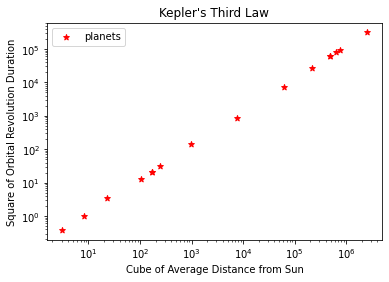

In [ ]:
plt.scatter(x_train, y_train, label= "planets", color= "red",
            marker= "*")
plt.xscale("log")
plt.xlabel('Cube of Average Distance from Sun')
plt.yscale("log")
plt.ylabel('Square of Orbital Revolution Duration')
plt.title('Kepler\'s Third Law')
plt.legend()
plt.show()

We can calculate the slope of the linear regression line by calculating the following sums: $m = \frac{\sum (x-x_i)(y-y_i)}{\sum (x-x_i)^2}$. $x_i$ is equal to the average of the $x$ values and $y_i$ is equal to the average of the $y$ values. We can then use this to find our y-intercept and get the equation for our linear regression line as $y = mx + b$.

In [ ]:
# finding the averages of the X and Y
xi = sum(x_train) / len(x_train)
yi = sum(y_train) / len(y_train)

# table and data for the datatable for calculations
xData = {'x': [i for i in x_train],
         'y': [i for i in y_train],
         'x-xi': [i - xi for i in x_train],
         'y-yi': [i - yi for i in y_train],
         '(x-xi)^2': [(i - xi) ** 2 for i in x_train],
         '(x-xi)(y-yi)': [(x_train[i] - xi) * (y_train[i] - yi) for i in range(len(x_train))]}
yData = pd.DataFrame(data = xData)
print(yData)

# finding the slope and intercept based on the calculations
slope = float(sum(yData[yData.columns[-1]]) / sum(yData[yData.columns[-2]]))
intercept = yi - slope * xi
print("From this data, we can conclude that the slope is %f and the intercept is %f" %(slope, intercept))

               x              y          x-xi           y-yi      (x-xi)^2  \
0   7.744552e+03     867.720740 -3.154000e+05  -39344.258099  9.947715e+10   
1   7.531077e+05   93764.564100  4.299631e+05   53552.585260  1.848683e+11   
2   2.149191e+05   27159.040000 -1.082255e+05  -13052.938840  1.171275e+10   
3   8.195266e+00       1.000000 -3.231363e+05  -40210.978840  1.044171e+11   
4   1.703927e+02      21.206946 -3.229741e+05  -40190.771894  1.043123e+11   
5   6.437913e+05   80156.934400  3.206468e+05   39944.955560  1.028143e+11   
6   1.707187e+02      21.279769 -3.229738e+05  -40190.699071  1.043121e+11   
7   4.943288e+05   61474.243600  1.711843e+05   21262.264760  2.930406e+10   
8   9.879694e+02     140.707044 -3.221566e+05  -40071.271796  1.037849e+11   
9   1.056863e+02      13.176900 -3.230388e+05  -40198.801940  1.043541e+11   
10  2.490246e+02      31.024900 -3.228955e+05  -40180.953940  1.042615e+11   
11  2.252728e+01       3.538161 -3.231220e+05  -40208.440679  1.

We will graph our linear regression equation with the graph in order to see how well the data points fit with it graphically/visually.

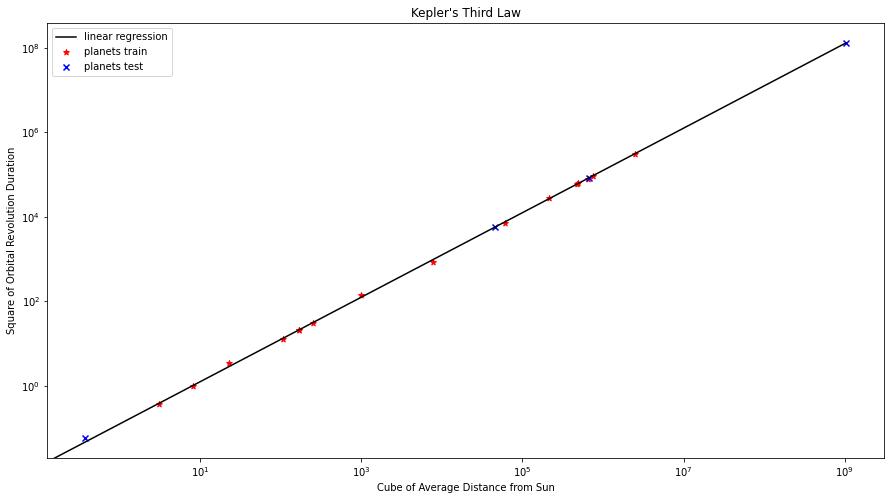

In [ ]:
# graph of the data points along with the linear regression line
plt.figure(figsize = (15, 8))
plt.scatter(x_train, y_train, label= "planets train", color= "red",
            marker= "*")
plt.scatter(x_test, y_test, label= "planets test", color= "blue",
            marker= "x")
a = np.linspace(0, max(x_train + x_test))
plt.plot(a, a * slope + intercept, label = "linear regression", color = "black")
plt.xscale("log")
plt.xlabel('Cube of Average Distance from Sun')
plt.yscale("log")
plt.ylabel('Square of Orbital Revolution Duration')
plt.title('Kepler\'s Third Law')
plt.legend()
plt.show()

In [ ]:
for idx, celestials in enumerate(x_test):
  print("The predicted value was %f and the expected value was %f" %(celestials * slope + intercept, y_test[idx]))
  print("The error is %f percent" %(abs((celestials * slope + intercept - y_test[idx]) / y_test[idx]) * 100))
  print()

The predicted value was 129615398.653947 and the expected value was 129732100.000000
The error is 0.089956 percent

The predicted value was 83409.208751 and the expected value was 83422.768900
The error is 0.016255 percent

The predicted value was -27.381599 and the expected value was 0.058081
The error is 47243.814890 percent

The predicted value was 5645.806407 and the expected value was 5673.102400
The error is 0.481148 percent

